## PREDICTING CHURN IN TELECOM'S DATASET

## Project Criteria
This project will follow the CRISP_DM Criteria

   >> Business understanding  
   >> Data Understanding  
   >> Data preparation  
   >> Modeling  
   >> Evaluation  
   >> Deployment  

## Business Understanding

### Project Overview

 * Churn occurs when customers are leaving a company's services in pursuit of better services from other network providers.  
 * This is caused by dissatisfaction of the company's services or competitors offering better prices.  
 * Churn causes loss of the revenue to the company and it makes it hard to retain customers.  
 * Identifying potential churners will help to retain customers and improve customer satisfaction.

 ### Business Problem

 The business objective is to identify customers with a high likelihood of churning and develop effective strategies to retain them. This involves analyzing key factors contributing to customer dissatisfaction and churn, such as network quality, customer service issues, or pricing concerns. Additionally, the goal is to segment customers based on their behavior and churn likelihood, enabling tailored marketing and retention strategies that address each group's unique needs and preferences.

 ### Objectives

1. Churn Prediction: Develop machine learning models to predict customers likely to churn by analyzing customer data and features.
2. Model Performance Assessment: Evaluate and compare machine learning models to identify the most accurate prediction model.
3. Increase Revenue: Retaining more customers will lead to higher revenue and an increase in market share.
4. Feature Insights: Analyze individual features to uncover key factors driving customer churn in the telecommunications company.

## Data Source
> My project utilizes data obtained from [Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/data), it is about customer churn in a telecommunication company.

### Data Description

1. State: The U.S. state in which the customer resides, represented by a two-letter abbreviation.
2. Account Length: The duration (in days) that the customer has been with the service provider.
3. Area Code: The telephone area code associated with the customer's phone number.
4. International Plan: Indicates whether the customer has subscribed to an international calling plan ('yes' or 'no').
5. Voice Mail Plan: Indicates whether the customer has a voice mail feature ('yes' or 'no').
6. Number Vmail Messages: The count of voice mail messages the customer has.
7. Total Day Minutes: The total number of minutes the customer has used during the day.
8. Total Day Calls: The total number of calls made by the customer during the day.
9. Total Day Charge: The total charges incurred by the customer for daytime calls.
10. Total Eve Minutes: The total number of minutes the customer has used during the evening.
11. Total Eve Calls: The total number of calls made by the customer during the evening.
12. Total Eve Charge: The total charges incurred by the customer for evening calls.
13. Total Night Minutes: The total number of minutes the customer has used during the night.
14. Total Night Calls: The total number of calls made by the customer during the night.
15. Total Night Charge: The total charges incurred by the customer for nighttime calls.
16. Total Intl Minutes: The total number of minutes the customer has used for international calls.
17. Total Intl Calls: The total number of international calls made by the customer.
18. Total Intl Charge: The total charges incurred by the customer for international calls.
19. Customer Service Calls: The number of calls the customer has made to customer service.
20. Churn: Indicates whether the customer has discontinued the service ('yes' for churned, 'no' for active).

## Data Preparation

In [182]:
# import relevant libraries
import csv 
import pandas as pd 
import seaborn as sns
import numpy as np


# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

# Modeling
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report 

# performance metrics
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [183]:
# loading our dataset
data = pd.read_csv("bigml_Telecom_dataset.csv")

## preview the first and last 3 rows of our dataset
display(data.head(3))
display(data.tail(3))


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


### Previewing the data to understand it features

In [184]:
print(f"The total number of rows to colums respectively is {data.shape}")

The total number of rows to colums respectively is (3333, 21)


In [185]:
print(f"The dataset contains the following columns {data.columns}")

The dataset contains the following columns Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [187]:
# checking descriptive statistical of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [188]:
"""
Perform value counts on the 'Churn' column to determine the distribution of churned and non-churned customers. 
This helps identify the proportion of customers who have discontinued the services.
"""
churn_count = data.churn.value_counts()
print(f'There are {churn_count[False]} customers who did not churn and {churn_count[True]} customers who churned')


There are 2850 customers who did not churn and 483 customers who churned


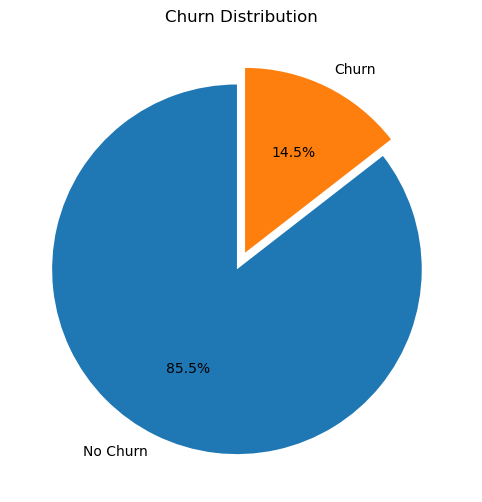

In [189]:
"""
plotting a pie chart to view distribution of churn and no churn
"""
# Pie Chart the churn feature
data['churn'].value_counts().plot.pie(
    explode=[0.05, 0.05], 
    autopct='%1.1f%%', 
    startangle=90, 
    shadow=False, 
    figsize=(8, 6),
    labels=['No Churn', 'Churn'])
plt.ylabel('')
plt.title('Churn Distribution')
plt.show()

85.5% of customers did not churn but 14.5% of customers did churn

### Explantory Data Analysis

In [190]:
# checking for missing values
data.isna().sum() 

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [191]:
# checking for duplicates
data.duplicated().sum()

0

### The dataset has no missing value or any duplicates

In [192]:
""" 
Checking for unique values, if a column has no uniqiue values we will drop that column
"""
data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [193]:
# Dropping some columns
## some columns are irrelevant to our analysis so we will drop them

irr_cols = ['state', 'account length', 'area code', 'phone number']
data.drop(columns = irr_cols, inplace = True)
# preview columns length
print(f"Total number of remaing columns {len(data.columns)}")

Total number of remaing columns 17


### Conducting univariante analysis

In [194]:
# spliting data according to the data type
## assign data types variable names 
num_col = data.select_dtypes(include=['int64', 'float64'])
cat_col = data.select_dtypes(include=['object', 'bool'])
# display the columns
display(num_col.columns)
display(cat_col.columns)

Index(['number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls'],
      dtype='object')

Index(['international plan', 'voice mail plan', 'churn'], dtype='object')

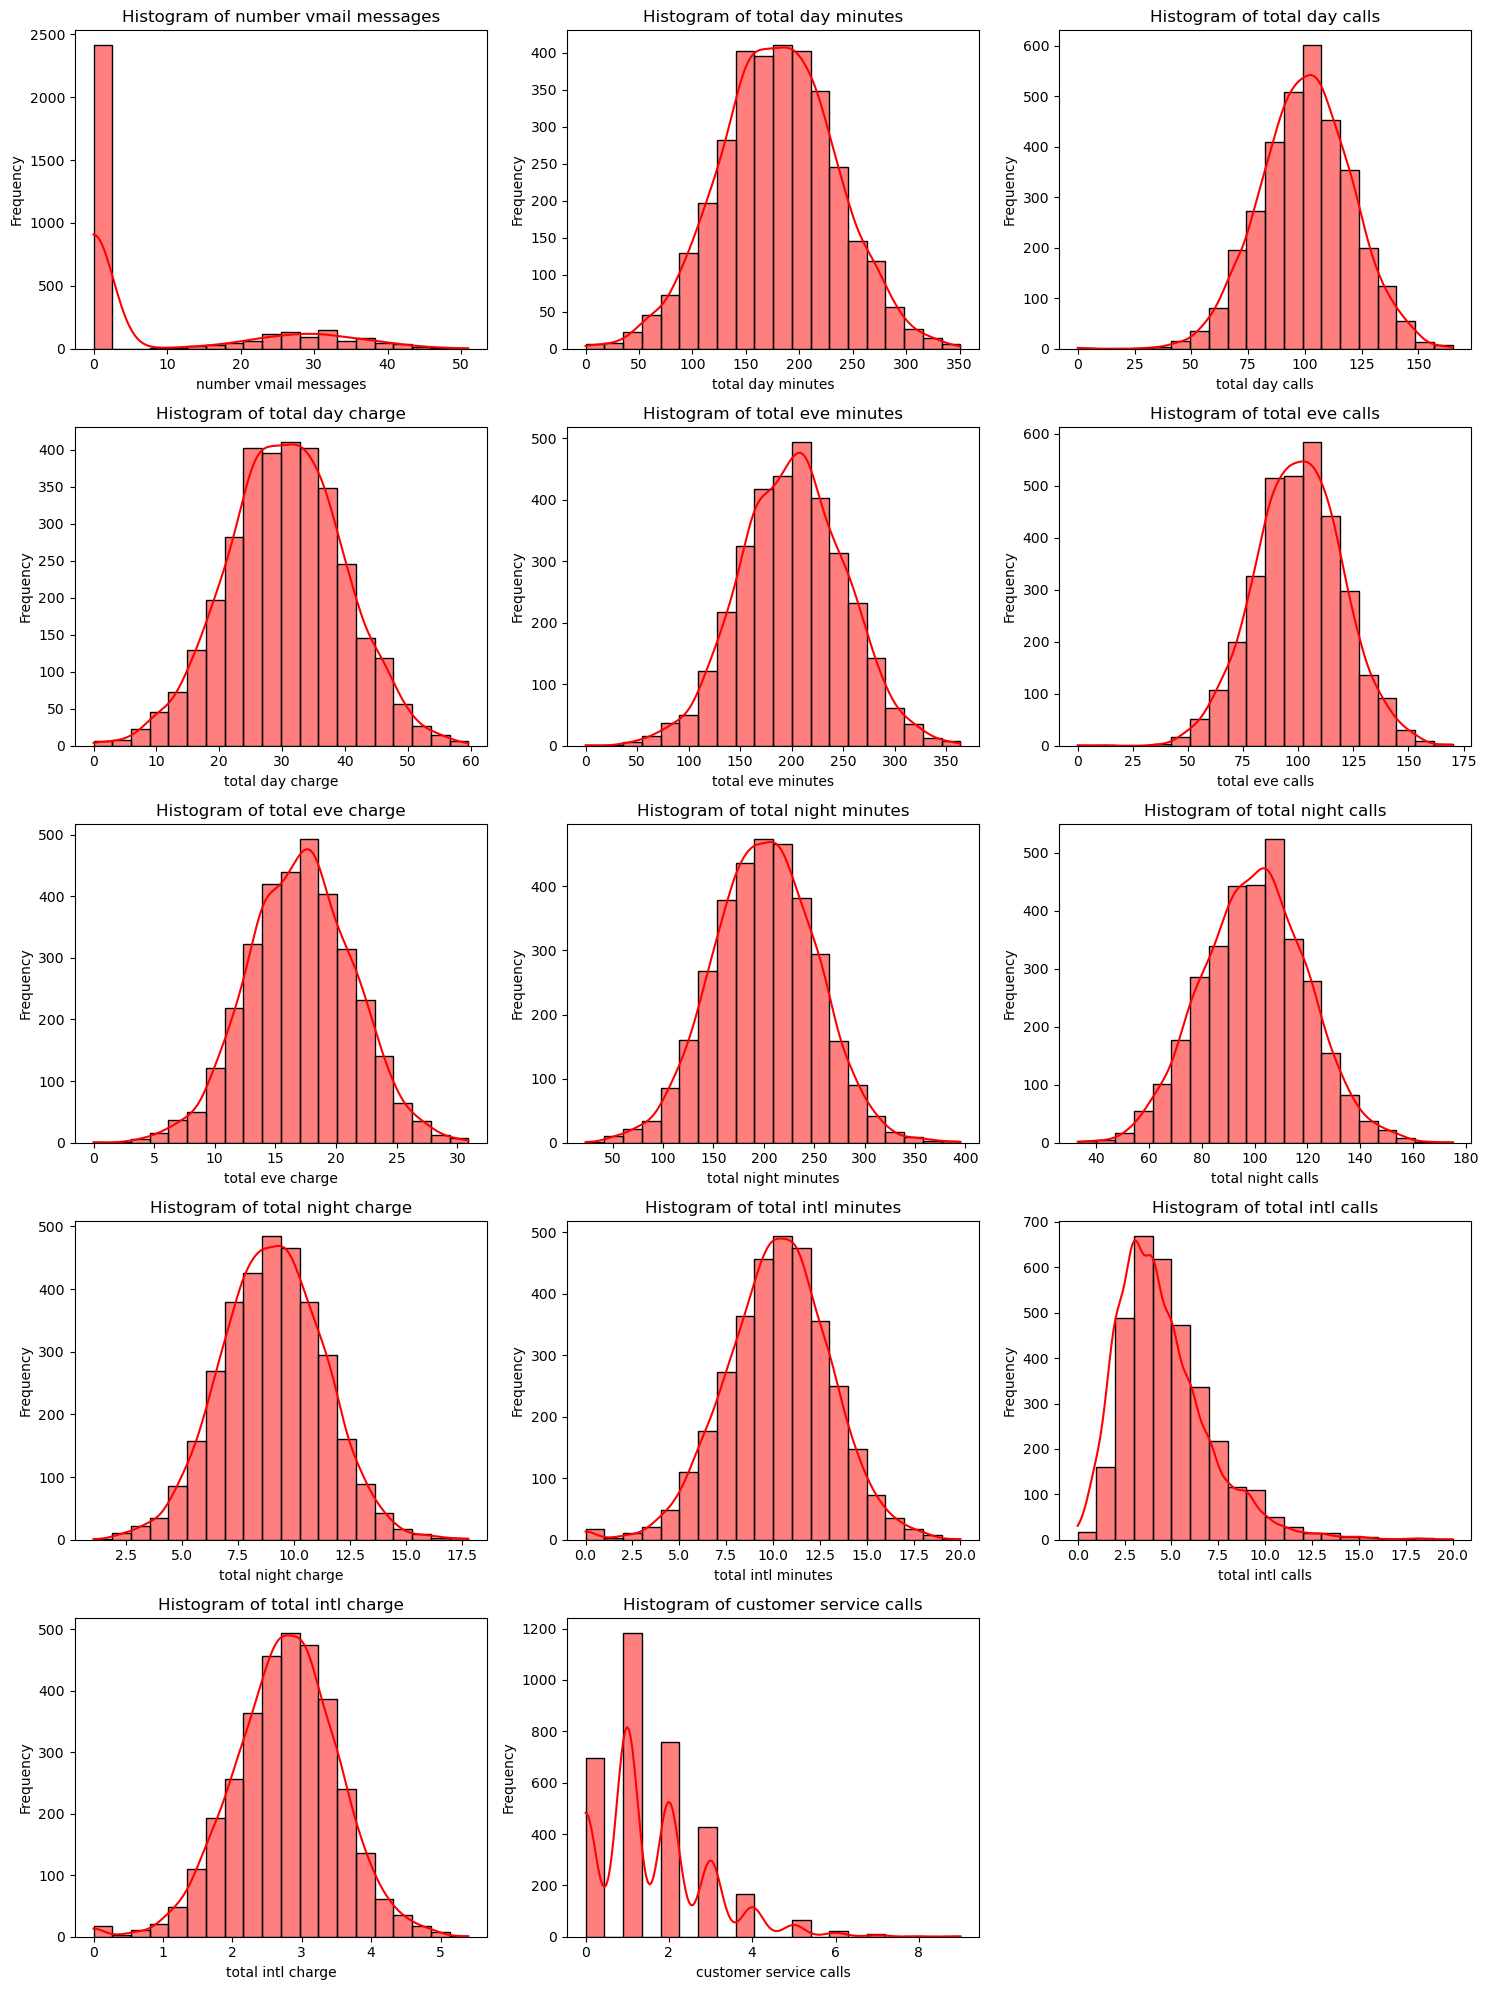

In [195]:
## ploting histogram for all the columns to check the distributiion of them
### plotting histo grams with KDE 
###  Calculating the number of plots needed per row
subplots_per_row = 3
num_subplots = num_col.shape[1]
num_rows = (num_subplots + subplots_per_row - 1) // subplots_per_row
# grid of subplots with determined rows and columns
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(15, 4 * num_rows))
axes = axes.flatten()

# Plotting histograms along with KDE
for i, column in enumerate(num_col.columns):
    sns.histplot(num_col[column], bins=20, kde=True, ax=axes[i], color='red')
    axes[i].set_title(f'Histogram of {column}') 
    axes[i].set_xlabel(column)  
    axes[i].set_ylabel('Frequency')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

1. The KDE curve closely matches the histogram in most columns, indicating a normal distribution, except for 'number_vmail_messages', 'total_intl_calls', and 'customer_service_calls'.
2. 'number_vmail_messages' and 'total_intl_calls' are right-skewed, with few customers exceeding 2000 voicemails or 600 international calls.
3. 'customer_service_calls' has multiple peaks and is likely integer-based, with around 1200 clients making just 1 call per day.

### Conducting Bivariante Analysis on categorical columns

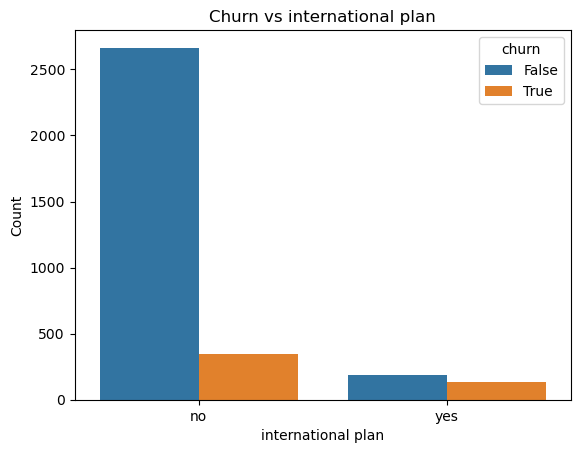

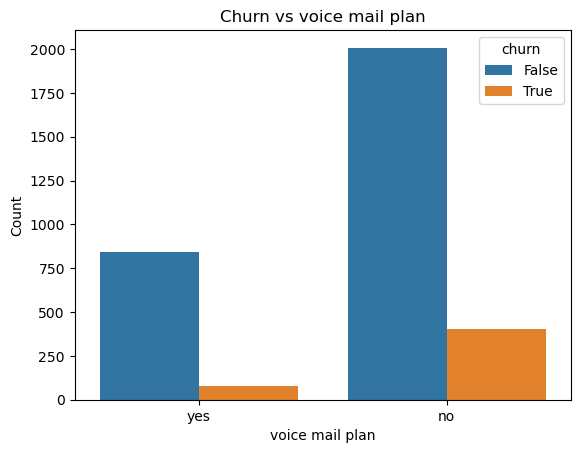

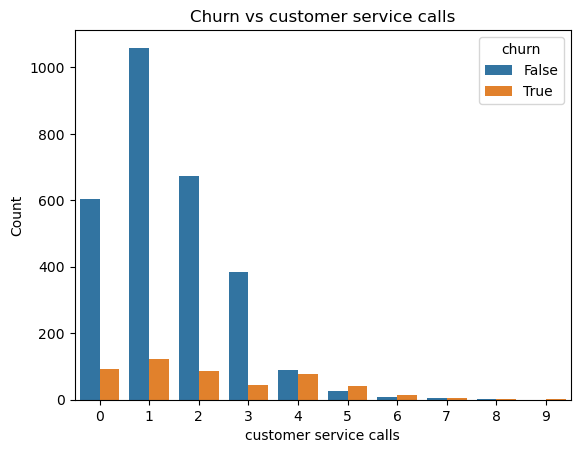

In [196]:
features= [
    'international plan', 
    'voice mail plan', 
    'customer service calls'
]
# create countplots for the features
for feature in features:
    sns.countplot(data=data, x=feature, hue= 'churn')
    plt.title(f'Churn vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

The above diagrams show a relationship for:  
        1. International plan and Churn  
        2. Voicemail plan and Churn  
        3. Customer Service calls and Churn

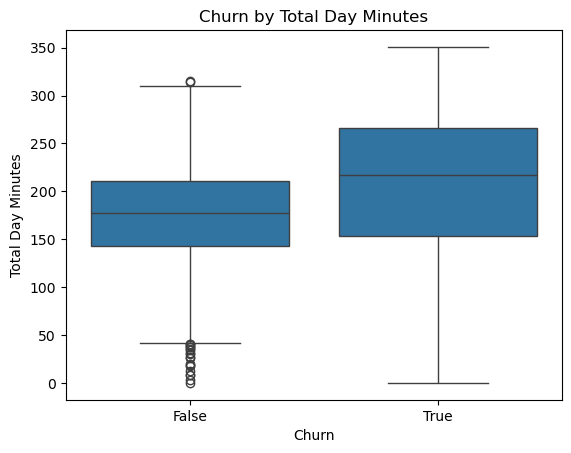

In [197]:
# boxplot for total day minutes and churn
plt.Figure(figsize=(8,6))
sns.boxplot(data=data, x='churn', y='total day minutes')
plt.title('Churn by Total Day Minutes')
plt.xlabel('Churn')
plt.ylabel('Total Day Minutes')
plt.show()

### MULTIVARIATE ANALYSIS

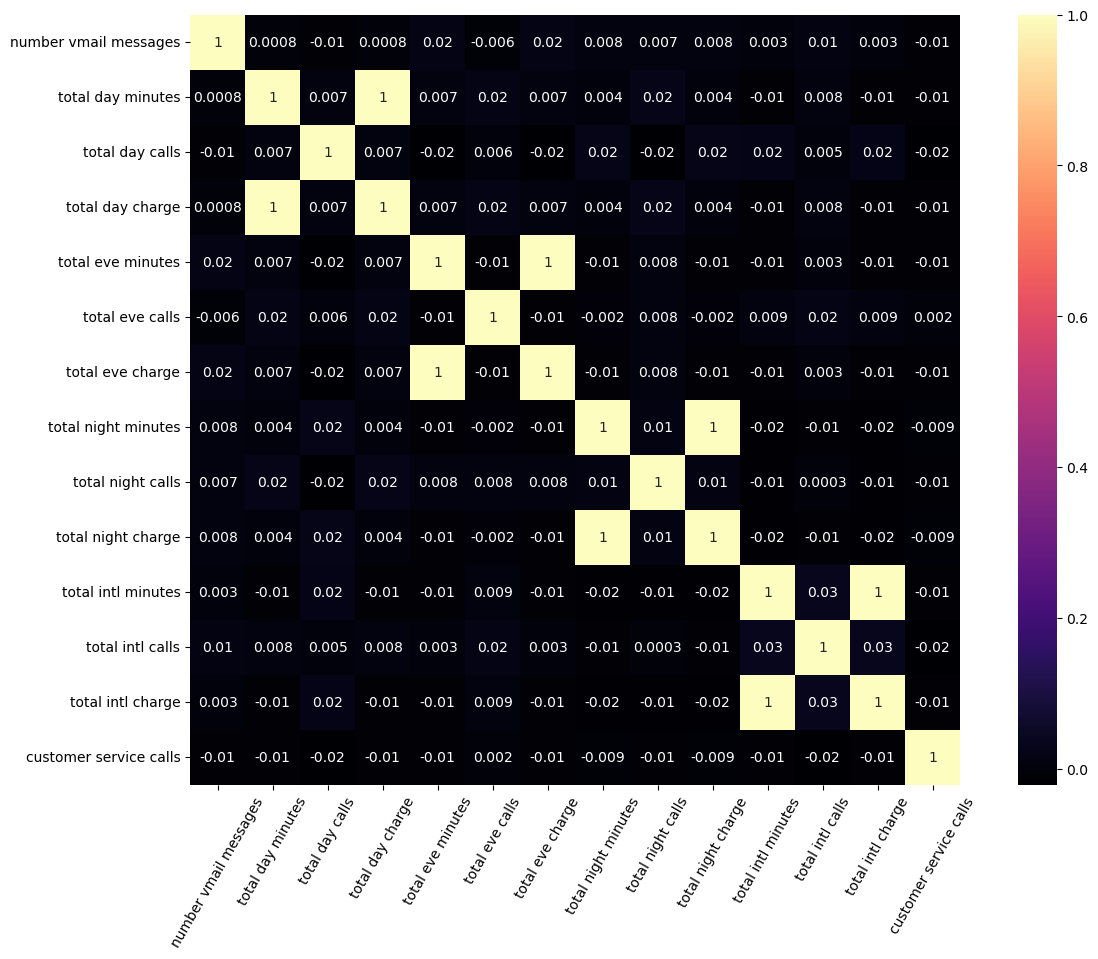

In [198]:
# Correlation matrix for numeric columns
correlation_matrix = num_col.corr()

# Creates a heatmap 
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', square=True, fmt='.0g')
plt.xticks(rotation=60)
plt.yticks(rotation=0)
plt.show()

#### We observe instances of perfect correlation:  
     A positive correlation of 1 between Total day charge and Total day minutes  
     A positive correlation of 1 between Total eve charge and Total eve minutes  
     A positive correlation of 1 between Total night charge and Total night minutes  
     A positive correlation of 1 between Total int charge and Total int minutes  
#### This is likely because the charges are calculated based on the minutes used.  
#### These pairs exhibit perfect multicollinearity.  

### CHECK FOR MULTICOLLINEARITY

In [199]:
vif_data = pd.DataFrame()
vif_data["Variable"] = num_col.columns
vif_data["VIF"] = [variance_inflation_factor(num_col.values, i) for i in range(num_col.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)
vif_data

,Variable,VIF
3,total day charge,1.245993e+08
1,total day minutes,1.245949e+08
6,total eve charge,3.736678e+07
4,total eve minutes,3.736587e+07
7,total night minutes,1.071768e+07
9,total night charge,1.071740e+07
12,total intl charge,9.975854e+05
10,total intl minutes,9.971901e+05
8,total night calls,2.210595e+01
5,total eve calls,2.172941e+01


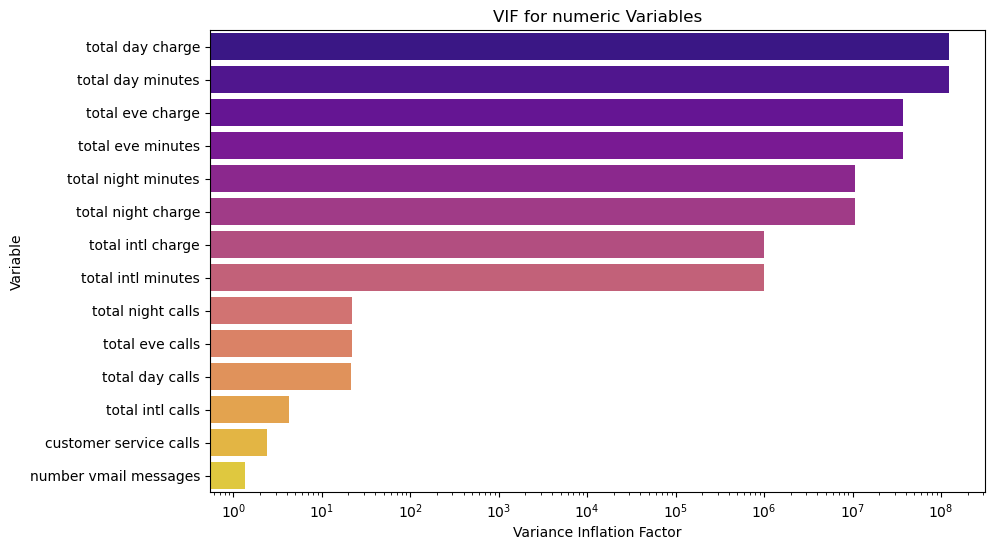

In [200]:
# Create a bar chart to visualize VIF values using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Variable', data=vif_data, palette='plasma')
plt.xlabel('Variance Inflation Factor')
plt.title('VIF for numeric Variables')
plt.xscale("log")
plt.show()

This columns showed high correlation, Hence indicating multicollinearity **total day minutes, total day charge, total eve charge, total eve minutes, total night minutes, total night charge, total intl minutes and total intl charge**. Due to this we will have to remove one variable in each of the higly correlated pairs.

#### Dropping variables with high VIF one per pair

In [201]:
# Creating a list to drop based on redundancy and high VIF
variables_to_drop = ['total day charge', 'total eve charge','total night charge', 'total intl charge']

# Drop these variables from the dataframe
data.drop(columns=variables_to_drop, inplace=True)

# Verify the remaining columns
print("Remaining columns after removing high VIF variables:")
print(data.columns)


Remaining columns after removing high VIF variables:
Index(['international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total eve minutes',
       'total eve calls', 'total night minutes', 'total night calls',
       'total intl minutes', 'total intl calls', 'customer service calls',
       'churn'],
      dtype='object')


#### Normalizing the variables to have a standard deviation 1 and mean 0. This ensures that all features contribute equally to the model and are on the same scale.

In [202]:
# Numerical columns
numerical_col = data.select_dtypes(include= ["int64", "float"]).columns
# create an instance of the scaler
scaler = StandardScaler()

# transforming the data
data[numerical_col] = scaler.fit_transform(data[numerical_col])

#### Perform one hot enconding to our cateagorical variables

In [203]:
#categorical columns
categorical_col = data.select_dtypes(include= ["object", "bool"]).columns
# I will use get_dummies to do one-hot encoding and then drop the first category
data = pd.get_dummies(data, columns=categorical_col, drop_first=True)
# preview
data.head()

,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,international plan_yes,voice mail plan_yes,churn_True
0,1.234883,1.566767,0.476643,-0.070610,-0.055940,0.866743,-0.465494,-0.085008,-0.601195,-0.427932,False,True,False
1,1.307948,-0.333738,1.124503,-0.108080,0.144867,1.058571,0.147825,1.240482,-0.601195,-0.427932,False,True,False
2,-0.591760,1.168304,0.675985,-1.573383,0.496279,-0.756869,0.198935,0.703121,0.211534,-1.188218,False,False,False
3,-0.591760,2.196596,-1.466936,-2.742865,-0.608159,-0.078551,-0.567714,-1.303026,1.024263,0.332354,True,False,False
4,-0.591760,-0.240090,0.626149,-1.038932,1.098699,-0.276311,1.067803,-0.049184,-0.601195,1.092641,True,False,False


## Modelling

This dataset involves a classification task where the churn column categorizes customers into two groups: True for those who have churned and False for loyal customers who haven’t. The goal is to predict customer churn using the provided features in this binary classification problem.

### Preprocessing data

In [204]:
## Defining our X and y
X = data.drop('churn_True', axis=1)
y = data['churn_True']
## Splitting the data into train sets and test sets using 20% and random_state of 42
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [205]:
## checking the class imbalance ussing value counts
y_train.value_counts()

churn_True
False    2284
True      382
Name: count, dtype: int64

Presence of class imbalance will lead to biased model towards the majority class, to deal with this we will use SMOTE to balance the class 

In [206]:
## balancing the classes
smote = SMOTE(random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)
y_train_resample.value_counts()

churn_True
False    2284
True     2284
Name: count, dtype: int64

Model to be analyized

1. Logistic Regression
2. Decision Tree Classifier
3. Random forest classifier

### Logistic Regression

In [207]:
# Create an instance of logistic regression model
logreg = LogisticRegression(random_state=42)

# Fit the model on the training data
logreg.fit(X_train_resample, y_train_resample)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

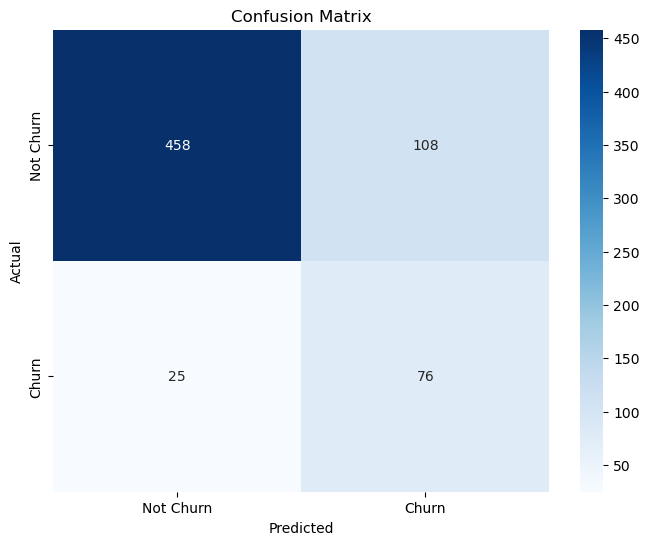

In [208]:
def plot_confusion_matrix(y_true, y_pred, labels):
    """
    Plots a confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Usage
plot_confusion_matrix(y_test, y_pred, labels=['Not Churn', 'Churn'])

The confusion matrix shows that the model has more true positives and true negatives than false positives and false negatives, indicating that its predictions are mostly accurate. This suggests the model is performing well and is not overfitting.

In [209]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print()

print("Classification Report: \n")
print(classification_report(y_test,y_pred))

Accuracy: 0.80

Classification Report: 

              precision    recall  f1-score   support

       False       0.95      0.81      0.87       566
        True       0.41      0.75      0.53       101

    accuracy                           0.80       667
   macro avg       0.68      0.78      0.70       667
weighted avg       0.87      0.80      0.82       667



In [210]:
# Make predictions on the test data using the tuned model
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8006
Precision: 0.4130
Recall: 0.7525
F1-score: 0.5333


The model has an accuracy of 80.06%, indicating that most of its predictions are correct. However, precision is relatively low at 41.30%, meaning many predicted churns are false positives. On the other hand, recall is higher at 75.25%, showing that the model effectively identifies most customers who churn. The F1-score of 53.33% reflects a trade-off between precision and recall, suggesting that while the model is good at identifying churn, there’s room for improvement in reducing false positives and improving overall balance.

In [211]:
# Define a range of hyperparameters to search
param_grid = {
    'penalty': ['l2'],  
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
}

# Creates a grid search object
grid_search = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42), param_grid, cv=5, scoring='accuracy')

# Performs grid search on the resampled data
grid_search.fit(X_train_resample, y_train_resample)

# Gets the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Creates and trains the Logistic Regression model with the best hyperparameters
best_logistic_model = LogisticRegression(solver='liblinear', random_state=42, **best_params)
best_logistic_model.fit(X_train_resample, y_train_resample)

# Make predictions on the test data
y_pred = best_logistic_model.predict(X_test) 

# Print the best parameters
print("Best Parameters:")
for key, value in best_params.items():
    print(f"{key}: {value}")

# Print the best F1 score
best_f1_score = round(grid_search.best_score_, 3)
print("Best F1 Score:", best_f1_score)


Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Best Parameters:
C: 10
penalty: l2
Best F1 Score: 0.783


#### After doing hyperparameter tunning we found that the best F1 score achieved during the grid search is **0.783**, which indicates a good balance between precision and recall

### Decision Tree Classifier

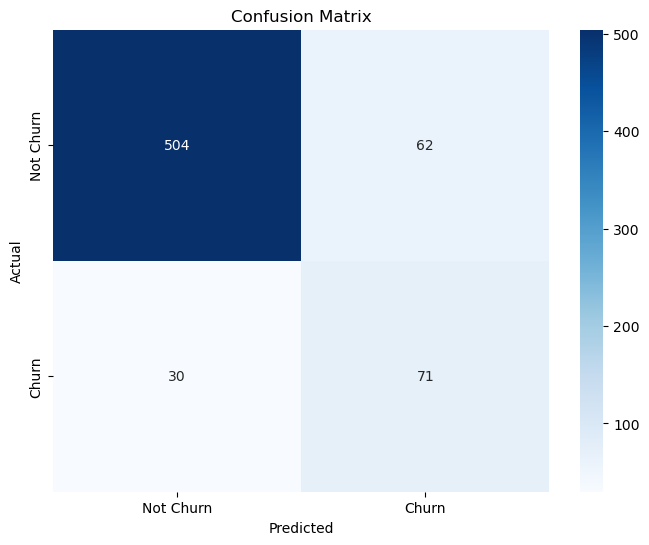

In [212]:
dec_tree = DecisionTreeClassifier(random_state=42)

#Fit on the training data
dec_tree.fit(X_train_resample,y_train_resample)

#predict on the test set
y_pred_dt = dec_tree.predict(X_test)

# ploting confusion matrix
plot_confusion_matrix(y_test, y_pred_dt, labels=['Not Churn', 'Churn'])

In [213]:
# Evaluating the DecisionTreeClassifier model
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy:.2f}')

print()

print("Classification Report: \n")
print(classification_report(y_test,y_pred_dt))

Accuracy: 0.86

Classification Report: 

              precision    recall  f1-score   support

       False       0.94      0.89      0.92       566
        True       0.53      0.70      0.61       101

    accuracy                           0.86       667
   macro avg       0.74      0.80      0.76       667
weighted avg       0.88      0.86      0.87       667



In [214]:
# Make predictions on the test data using the tuned model
y_pred_dt = dt_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dt)

# Calculate precision
precision = precision_score(y_test, y_pred_dt)

# Calculate recall
recall = recall_score(y_test, y_pred_dt)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_dt)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8621
Precision: 0.5338
Recall: 0.7030
F1-score: 0.6068


The decision tree model has an **accuracy** of 86.21%, meaning it correctly predicts most cases. **Precision** is 53.38%, indicating the model's positive predictions are correct about half the time. **Recall** is 70.30%, showing it correctly identifies most churn cases but misses some. The **F1-score** of 60.68% reflects a moderate balance between precision and recall, suggesting the model could be improved, particularly in reducing false positives.

In [215]:
# Define the model
dt2_classifier = DecisionTreeClassifier()

# Define the parameter grid to search through
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Create a grid search object using 5-fold cross-validation and F1 score as the scoring metric
grid_search = GridSearchCV(estimator=dt2_classifier, param_grid=param_grid, cv=5, scoring='f1')

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resample, y_train_resample)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters and the best F1 score
print("Best Parameters:", best_params)
print("Best F1 Score:", grid_search.best_score_) 

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 8}
Best F1 Score: 0.9122178657635892


The Best F1 Score of 0.912 indicates excellent performance in balancing both precision and recall, suggesting that the model effectively distinguishes between classes.

In [216]:
# Train the Decision Tree model 
best_tree_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

# Fit the model to the training data
best_tree_model.fit(X_train_resample, y_train_resample)

# Make predictions on the test data
y_pred_tree = best_tree_model.predict(X_test)

# Calculate and print the accuracy, precision, recall, and F1 score
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_tree:.4f}")
print(f"Precision: {precision_tree:.4f}")
print(f"Recall: {recall_tree:.4f}")
print(f"F1-score: {f1_tree:.4f}")


Accuracy: 0.9175
Precision: 0.7212
Recall: 0.7426
F1-score: 0.7317


The model achieved an accuracy of 91.75%, meaning it correctly predicted most cases. The precision of 72.12% indicates that when the model predicted a positive outcome, it was correct 72.12% of the time. The recall of 74.26% shows it correctly identified 74.26% of the actual positive cases, though it missed some. The F1-score of 73.17% reflects a good balance between precision and recall, indicating the model performs well in both minimizing false positives and detecting positive cases.

### RANDOM FOREST CLASSIFIER

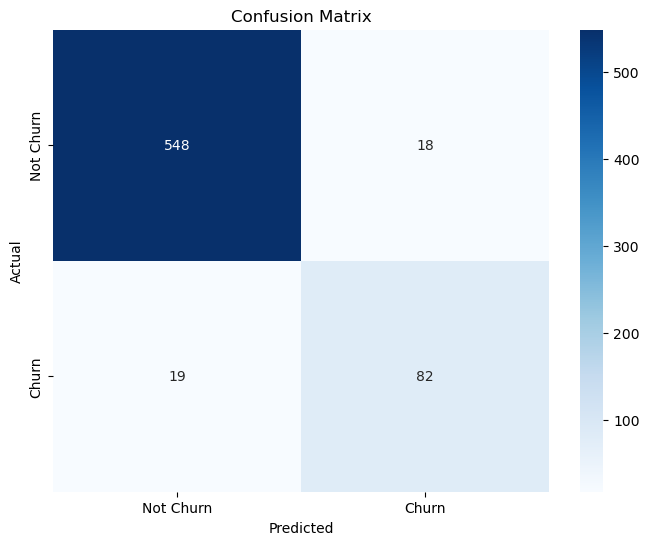

In [217]:
# Create and train the Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
#fit on the training data
rf_clf.fit(X_train_resample, y_train_resample)

# Make predictions on the test data
y_pred_rf = rf_clf.predict(X_test)

plot_confusion_matrix(y_test, y_pred_rf,  labels=['Not Churn', 'Churn'])

In [218]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy:.2f}')

print()

print("Classification Report: \n")
print(classification_report(y_test,y_pred_rf))

Accuracy: 0.94

Classification Report: 

              precision    recall  f1-score   support

       False       0.97      0.97      0.97       566
        True       0.82      0.81      0.82       101

    accuracy                           0.94       667
   macro avg       0.89      0.89      0.89       667
weighted avg       0.94      0.94      0.94       667



In [219]:
# Make predictions on the test data using the tuned model
y_pred_rf = rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)

# Calculate precision
precision = precision_score(y_test, y_pred_rf)

# Calculate recall
recall = recall_score(y_test, y_pred_rf)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_rf)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9445
Precision: 0.8200
Recall: 0.8119
F1-score: 0.8159


The model achieved an **accuracy** of 94.45%, indicating it correctly predicted most cases. The **precision** of 82.00% shows that when the model predicted a positive outcome, it was correct 82% of the time. The **recall** of 81.19% indicates it identified 81.19% of the actual positive cases. The **F1-score** of 81.59% reflects a strong balance between precision and recall, indicating good overall performance with minimal false positives and false negatives.

In [220]:
# Hyperparameter tunning
# Define the parameter grid to search through
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Scores
scores = ['f1', 'recall', 'precision']

# Create a grid search object using 5-fold cross-validation
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring=scores, refit='f1', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_resample, y_train_resample)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters and the best score with 3 decimal places
print("Hyperparameter Tuning for Random Forest Model:")
print("Best Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

best_score = round(grid_search.best_score_, 3)
print(f"Best Score: {best_score}")

Hyperparameter Tuning for Random Forest Model:
Best Parameters:
max_depth: 15
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 200
Best Score: 0.956


In [221]:
# Train the random forest classifier
rf2 = RandomForestClassifier(n_estimators=200,
                             random_state=42,
                             max_depth=15,
                             min_samples_leaf=1,
                             min_samples_split=2)
rf2.fit(X_train_resample, y_train_resample)

# Make predictions on the test data
rf2_y_pred = rf2.predict(X_test)

# Evaluate the model's accuracy
rf2_f1_score = round(f1_score(y_test, rf2_y_pred), 3)
rf2_acc_score = round(accuracy_score(y_test, rf2_y_pred), 3)
rf2_prec_score = round(precision_score(y_test, rf2_y_pred), 3)
rf2_rec_score = round(recall_score(y_test, rf2_y_pred), 3)


print("Random Forest Model with Best Parameters:")
print(f'The Precision: {rf2_prec_score}')
print(f'The Accuracy: {rf2_acc_score}')
print(f'F1 Score: {rf2_f1_score}')
print(f'The Recall Score: {rf2_rec_score}')

Random Forest Model with Best Parameters:
The Precision: 0.798
The Accuracy: 0.937
F1 Score: 0.79
The Recall Score: 0.782


The Random Forest model with the best parameters achieved a precision of 0.798, indicating that 79.8% of positive predictions were correct. It has a high accuracy of 0.937, correctly predicting 93.7% of cases. The F1 score of 0.79 shows a good balance between precision and recall, while the recall of 0.782 means it identified 78.2% of actual positive cases. Overall, the model performs well with strong accuracy and balanced precision and recall.

## Evaluation

The evaluation metrics that I will focus on are:
* Accuracy
* Precision
* Recall
* F1 Score


 **Accuracy**

Logistic Regression = 86.21%

Decision Tree = 91.75% 

Random Forest = 93.7%

The Random Forest model performs the best with 93.7% accuracy, followed by the Decision Tree (91.75%) and Logistic Regression (86.21%).

 **Precision**
 
Logistic Regression = 41.3% 

Decision Tree = 53.38% 

Random Forest = 82% 

The Random Forest model has the highest precision, indicating it made the most accurate positive predictions. The Decision Tree performed better than Logistic Regression in this aspect.

**Recall**

Logistic Regression = 75.25% 

Decision Tree = 74.26%

Random Forest = 81.19%

The Random Forest model again performs the best in recall, identifying 81.19% of positive cases. The Logistic Regression has the highest recall compared to the Decision Tree.

 **F1 Score**

Logistic Regression = 53.3%

Decision Tree = 60.7%

Random Forest = 81.6%

The Random Forest model again outperforms the other models, showing the best balance between precision and recall. The Decision Tree follows, and Logistic Regression has the lowest F1 score.

#### summary of the models

Random Forest model consistently outperforms the other two models across all metrics, making it the best choice among the three

### Preview Feature Importance
Feature importance refers to the measure of how important each feature (input variable) is in predicting the target variable

In [222]:
# Get the feature importances
importances = rf2.feature_importances_

# Create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Sort the dataframe by the feature importances in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the first few rows of the feature importances with 3 decimal places
print(feature_importances.head().round(3))

                   feature  importance
1        total day minutes       0.224
9   customer service calls       0.185
10  international plan_yes       0.130
8         total intl calls       0.088
3        total eve minutes       0.081


In this case, total day minutes and customer service calls are the most significant, while total eve minutes has the least impact. This can guide further analysis and potential feature selection.

Monitoring the number of **customer service calls** is important because a high volume may indicate customer dissatisfaction.  

### Conclusion

**Model Performance**: I tested 3 models with Random Forest Classifier emerging as the top performer, achieving a remarkable 95% accuracy and well-balanced precision and recall.

**Key Features**: The analysis showed some influential features: "customer_service_calls", "total_day_minutes","total day charge", "total intl calls" and "total eve charge" highlighting their importance in predicting churn.

In summary, the analysis recommends Random Forest Classifier for predicting customer churn.


## Recommedation

**Improve Customer Service**: 
 * High customer service calls correlate with churn.  
 * Reduce customer service calls and improve quality of customer service by offering comprehensive training to customer service representatives.  
**Pricing Structure Evaluation**:
 * Evaluate the pricing structure for day, evening, night, and international charges.  
 * Adjusting pricing plans or introducing discounted packages would address the concerns related to higher charges, which contribute to customer churning.  
**Engage with Clients likely to churn**:
 * Reach out to clients who have a high daily usage.
 * They have the most likelihood of churning.